In [1]:
import os
import sys
from collections import Counter, defaultdict

import pydicom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
!mkdir ./dcm_scratch
!rm ./dcm_scratch/*
#!cp /mnt/disks/brain-zip/6025769_20220_2_0.zip ./dcm_scratch/
#!unzip ./dcm_scratch/6025769_20220_2_0.zip -d ./dcm_scratch/
!cp //home/sam/t1test/1000503_20216_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000503_20216_2_0.zip -d ./dcm_scratch/

mkdir: cannot create directory './dcm_scratch': File exists
Archive:  ./dcm_scratch/1000503_20216_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374756302355469.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374757388855477.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374164178154740.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374138653254700.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937413607754649.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374047289354571.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374695912055403.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937457132155202.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374397582555051.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937433003554926.dcm  
  inflating: ./dcm_scratch/

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374674970055388.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937466820555331.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374533218355233.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374440455655114.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374437852455111.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374343632254968.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374295478254912.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374261685054866.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374221425254814.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374122474954674.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374099304454642.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374618708855342.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374640501255359.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374550876255262.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374533898455235.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374389411655034.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374319823654945.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374077568954614.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937474927955414.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.201708240937464926955327.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374289338354899.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374270307454879.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374687285955399.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374680794955390.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374624400955348.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374584054555315.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374573845255282.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374482323655168.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374437571255110.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374359993555001.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374341322954964.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374327655254954.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.19.145172.2017082409374259987954862.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.

In [7]:
stats = Counter()
dcm_dir = './dcm_scratch/'
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    stats['count'] += 1
    stats[f'series_num_{dcm.SeriesNumber}'] += 1
    stats[f'instance_num_{dcm.InstanceNumber}'] += 1
    #print(dcm.InstanceNumber, dcm.SeriesNumber, dcm.SeriesDescription, dcm.PixelSpacing)
    #print(f" series num:{dcm.SeriesNumber} Instance number: {dcm.InstanceNumber}, rows:{dcm.Rows}, cols:{dcm.Columns}")

for k in stats:
    print(f'{k} has {stats[k]}')

count has 416
series_num_5 has 208
instance_num_43 has 2
series_num_6 has 208
instance_num_77 has 2
instance_num_111 has 2
instance_num_17 has 2
instance_num_139 has 2
instance_num_165 has 2
instance_num_116 has 2
instance_num_103 has 2
instance_num_167 has 2
instance_num_75 has 2
instance_num_155 has 2
instance_num_105 has 2
instance_num_58 has 2
instance_num_10 has 2
instance_num_146 has 2
instance_num_71 has 2
instance_num_84 has 2
instance_num_30 has 2
instance_num_177 has 2
instance_num_53 has 2
instance_num_87 has 2
instance_num_187 has 2
instance_num_44 has 2
instance_num_178 has 2
instance_num_136 has 2
instance_num_121 has 2
instance_num_196 has 2
instance_num_47 has 2
instance_num_156 has 2
instance_num_151 has 2
instance_num_25 has 2
instance_num_35 has 2
instance_num_145 has 2
instance_num_179 has 2
instance_num_15 has 2
instance_num_109 has 2
instance_num_126 has 2
instance_num_11 has 2
instance_num_96 has 2
instance_num_131 has 2
instance_num_80 has 2
instance_num_92 has 

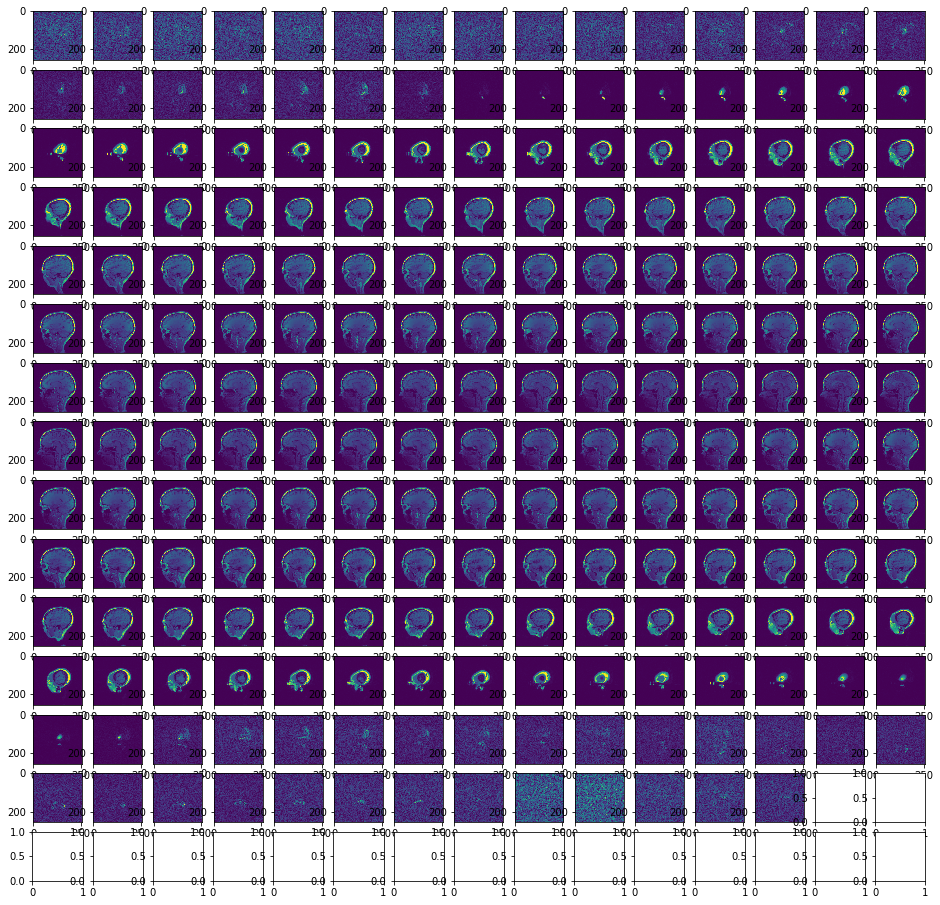

In [8]:
num_cols = num_rows = 15
_, axes = plt.subplots(num_cols, num_rows, figsize=(16, 16))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    if dcm.SeriesNumber in [6, 12]:
        continue
    #print(f"Series: {dcm.SeriesDescription.lower().replace(' ', '_')}, Instance number: {dcm.InstanceNumber}, dcm series {dcm.SeriesNumber} big pix:{dcm.LargestImagePixelValue}")
    ideal_index = int(dcm.InstanceNumber)-1
    axes[ideal_index//num_cols, ideal_index%num_cols].imshow(dcm.pixel_array)

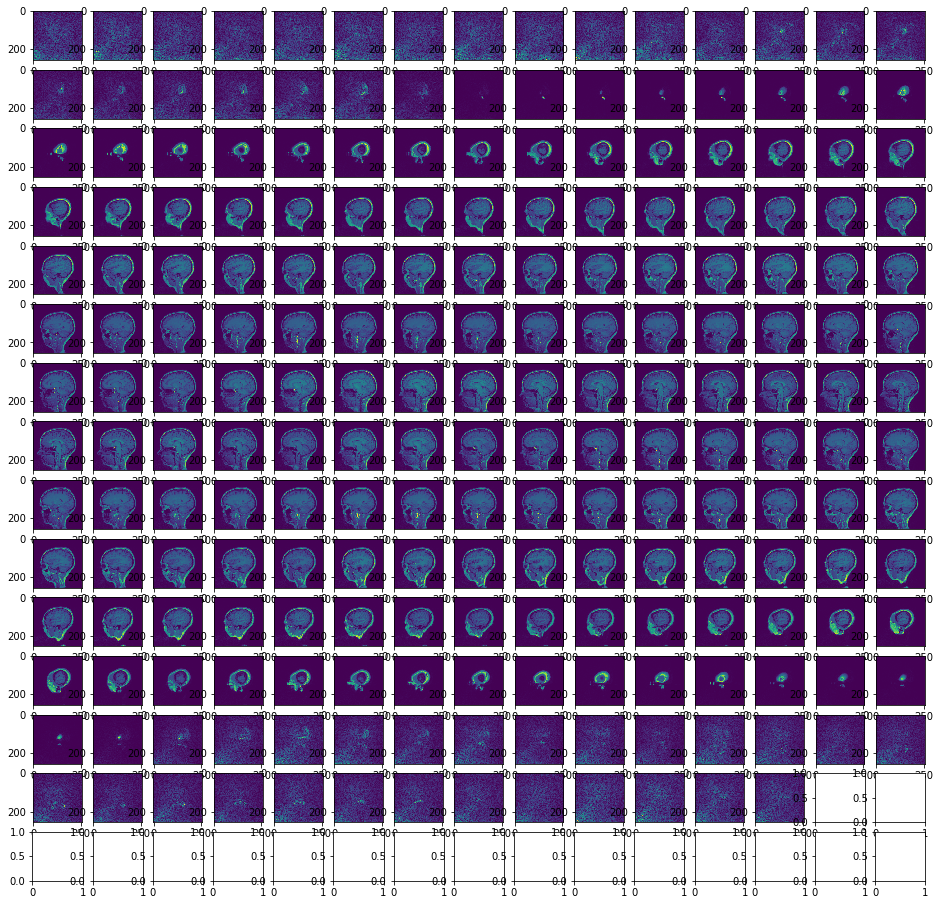

In [9]:
num_cols = num_rows = 15
_, axes = plt.subplots(num_cols, num_rows, figsize=(16, 16))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    if dcm.SeriesNumber in [5, 11]:
        continue
    #print(f"Series: {dcm.SeriesDescription.lower().replace(' ', '_')}, Instance number: {dcm.InstanceNumber}, dcm series {dcm.SeriesNumber} big pix:{dcm.LargestImagePixelValue}")
    ideal_index = int(dcm.InstanceNumber)-1
    axes[ideal_index//num_cols, ideal_index%num_cols].imshow(dcm.pixel_array)

In [ ]:
!rm ./dcm_scratch/*
!cp /mnt/disks/data/raw/mris/liver/1098695_20203_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1098695_20203_2_0.zip -d ./dcm_scratch/

In [ ]:
_, axes = plt.subplots(2, 10, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(f"Series: {dcm.SeriesDescription.lower().replace(' ', '_')} Instance number: {dcm.InstanceNumber}, pix space{dcm.PixelSpacing} big pix:{dcm.LargestImagePixelValue}")
    if dcm.LargestImagePixelValue > 1024:
        row = 1    
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array)

In [ ]:
!rm ./dcm_scratch/*
!cp /home/sam/liver_mri_bulk/1000107_20204_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000107_20204_2_0.zip -d ./dcm_scratch/

In [ ]:
_, axes = plt.subplots(4, 7, figsize=(16, 8))
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    row = 0
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    print(f"Series description:{dcm.SeriesDescription.lower().replace(' ', '_')} Series num:{dcm.SeriesNumber} Instance number: {dcm.InstanceNumber}, pix space{dcm.PixelSpacing} big pix:{dcm.LargestImagePixelValue}, rows:{dcm.Rows}, cols:{dcm.Columns}")

    if 'fitparams' in dcm.SeriesDescription.lower():
        row = 2
    elif 't1map' in dcm.SeriesDescription.lower():
        row = 3
    elif dcm.LargestImagePixelValue > 1024:
        row = 1 
    axes[row, dcm.InstanceNumber-1].imshow(dcm.pixel_array)